✓ File exists: ivim_chest.nii
• Data shape: (224, 224, 67, 9)
• Data type: float64
• Value range: [0.000, 3827.761]
• Affine transform:
[[-2.00886607e+00 -3.21494765e-03  4.62979451e-02  2.23166367e+02]
 [-3.25112999e-03  2.00892043e+00 -1.39706433e-02 -2.18109299e+02]
 [ 1.54939648e-02  4.70260251e-03  5.99981689e+00 -1.91489120e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
• 4D data detected with 9 volumes/channels

Displaying middle slices in three orientations:


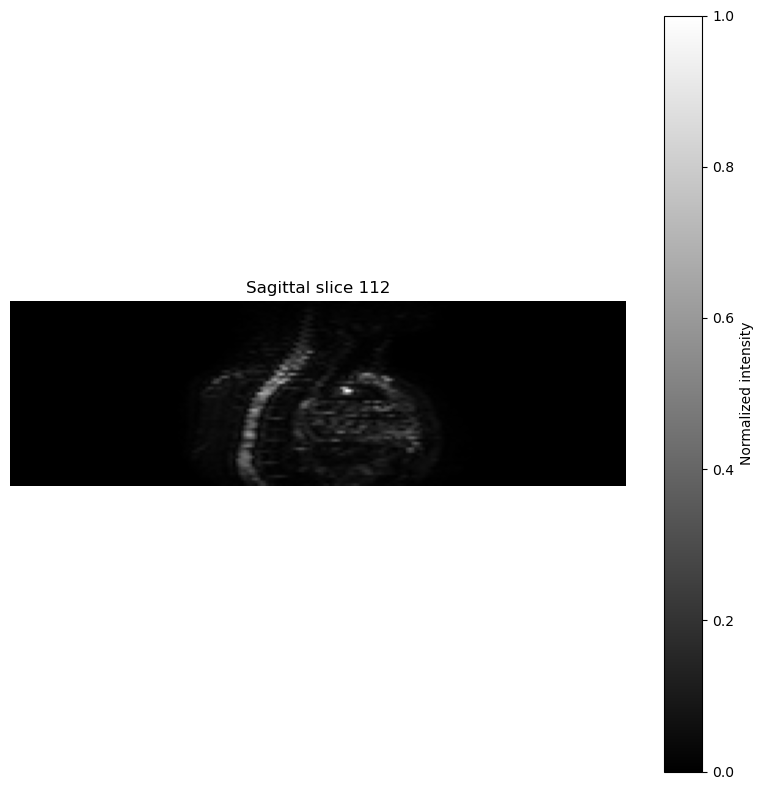

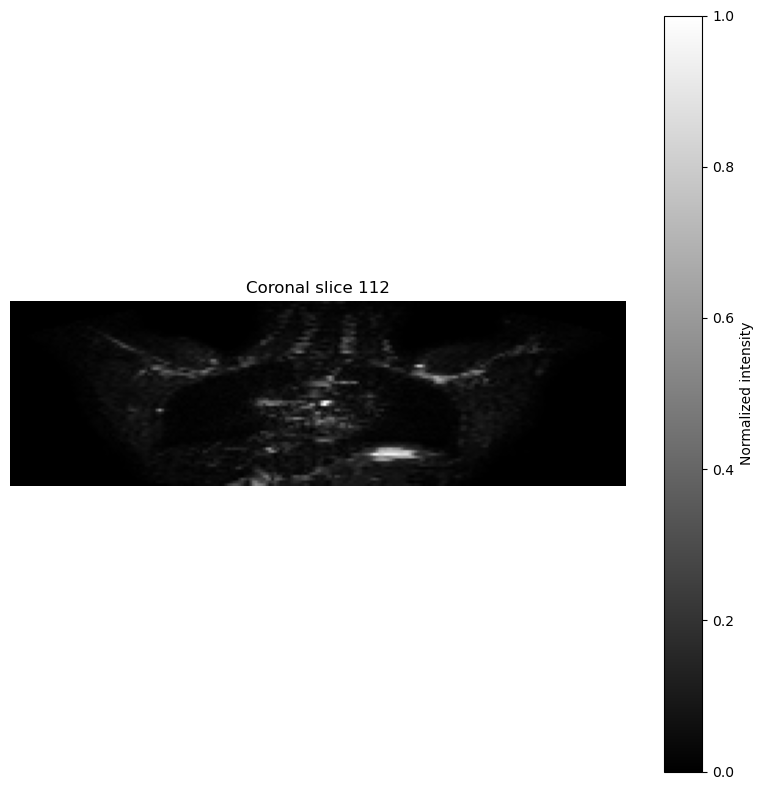

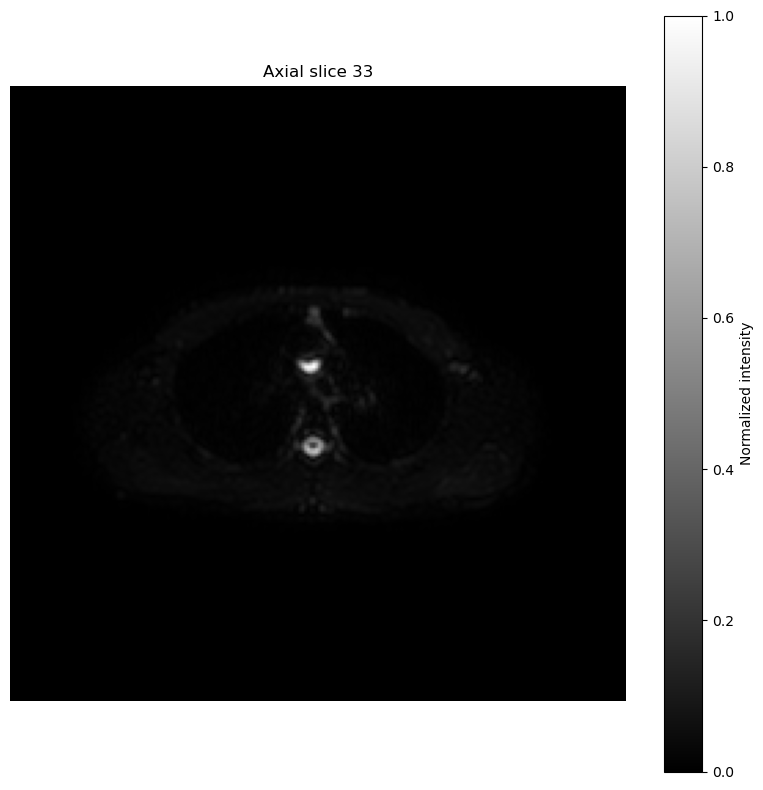


Displaying first few volumes (axial view):


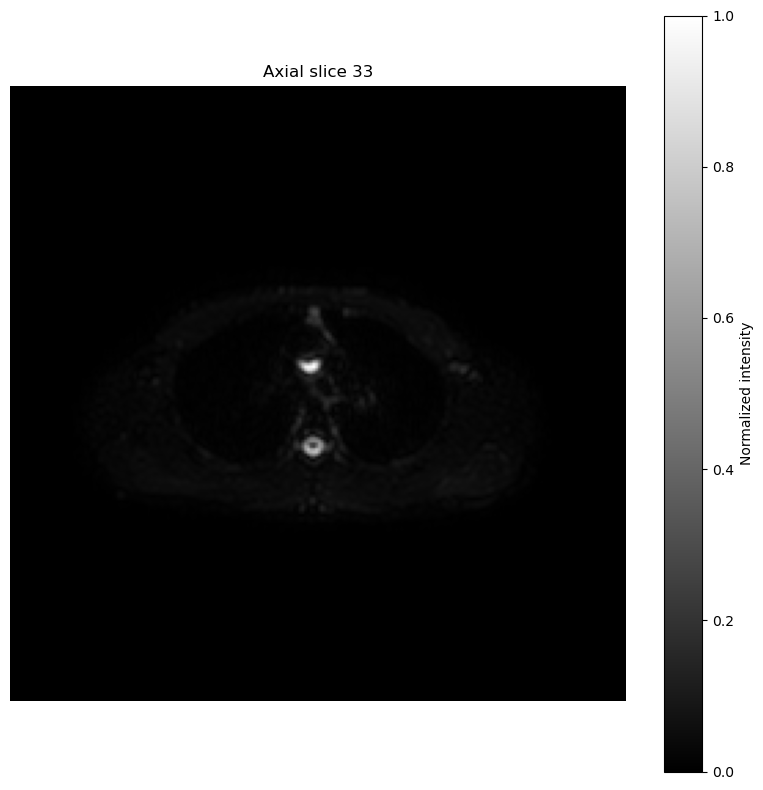

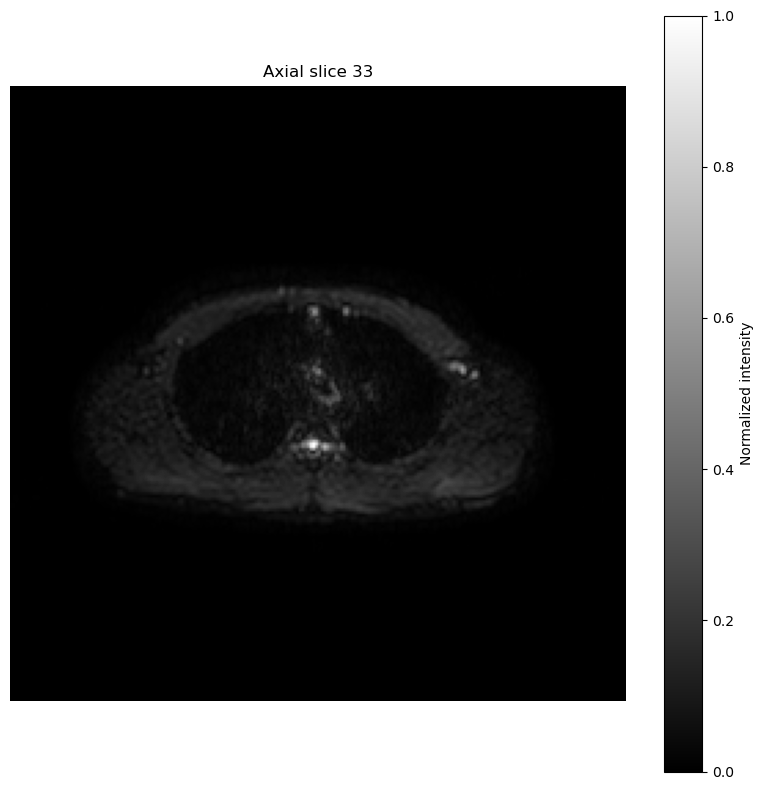

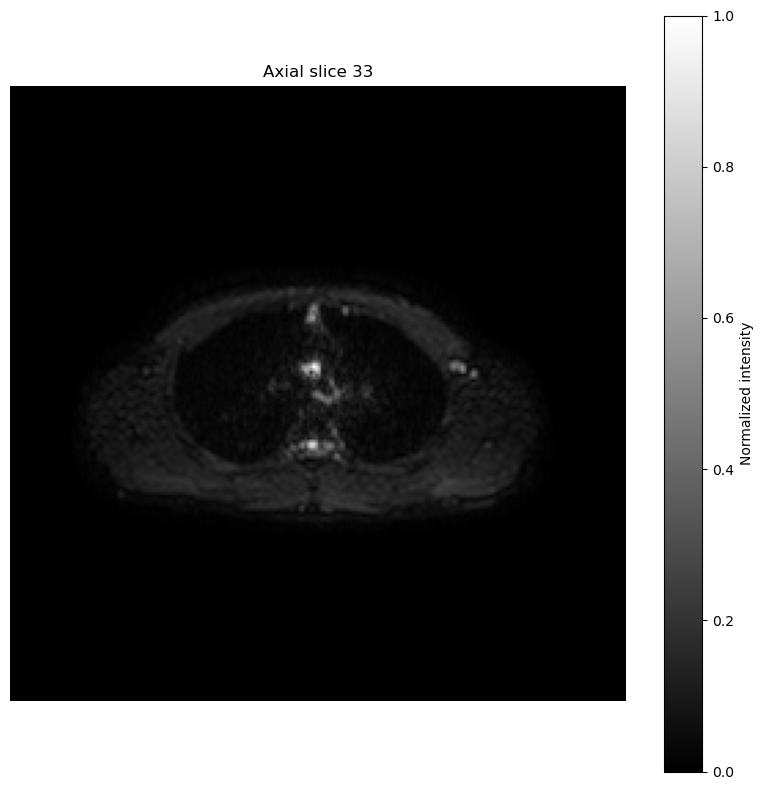

In [4]:
import os
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np

# Use inline plotting for Jupyter
%matplotlib inline

def check_file(nifti_path):
    """Check if file exists and print basic info"""
    if not os.path.exists(nifti_path):
        print(f"❌ Error: File not found at {nifti_path}")
        return False
    
    print(f"✓ File exists: {os.path.basename(nifti_path)}")
    return True

def display_nii_info(nifti_path):
    """Print information about the NIfTI file"""
    img = nib.load(nifti_path)
    data = img.get_fdata()
    
    print(f"• Data shape: {data.shape}")
    print(f"• Data type: {data.dtype}")
    print(f"• Value range: [{data.min():.3f}, {data.max():.3f}]")
    print(f"• Affine transform:\n{img.affine}")
    
    # Check if 4D data (has multiple channels/timepoints)
    if len(data.shape) > 3:
        print(f"• 4D data detected with {data.shape[3]} volumes/channels")
    
    return data

def display_nii_slice(data, slice_index=None, axis=2, volume_index=0):
    """Display a slice from the data"""
    # Handle 4D data by selecting the specified volume
    if len(data.shape) > 3:
        if volume_index >= data.shape[3]:
            print(f"❌ Error: Volume index {volume_index} out of range (max: {data.shape[3]-1})")
            return
        display_data = data[..., volume_index]
    else:
        display_data = data
    
    # Set default slice to middle if not specified
    if slice_index is None:
        slice_index = display_data.shape[axis] // 2
    
    # Extract the slice based on the axis
    if axis == 0:
        slice_data = display_data[slice_index, :, :]
        orientation = "Sagittal"
    elif axis == 1:
        slice_data = display_data[:, slice_index, :]
        orientation = "Coronal"
    else:  # axis == 2 (default)
        slice_data = display_data[:, :, slice_index]
        orientation = "Axial"
    
    # Normalize for better visualization
    if slice_data.max() > slice_data.min():
        norm_data = (slice_data - slice_data.min()) / (slice_data.max() - slice_data.min())
    else:
        norm_data = slice_data
    
    # Display
    plt.figure(figsize=(8, 8))
    plt.imshow(norm_data.T, cmap='gray', origin='lower')
    plt.title(f'{orientation} slice {slice_index}')
    plt.colorbar(label='Normalized intensity')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Main execution
nifti_path = '/Users/ayush/Desktop/project-internsip/Datasets/ivim_chest.nii'

if check_file(nifti_path):
    # Load and display info
    data = display_nii_info(nifti_path)
    
    # Display middle slices in all three orientations
    print("\nDisplaying middle slices in three orientations:")
    display_nii_slice(data, axis=0)  # Sagittal
    display_nii_slice(data, axis=1)  # Coronal
    display_nii_slice(data, axis=2)  # Axial
    
    # If it's 4D data, check different volumes
    if len(data.shape) > 3:
        print("\nDisplaying first few volumes (axial view):")
        for vol in range(min(3, data.shape[3])):
            display_nii_slice(data, axis=2, volume_index=vol)

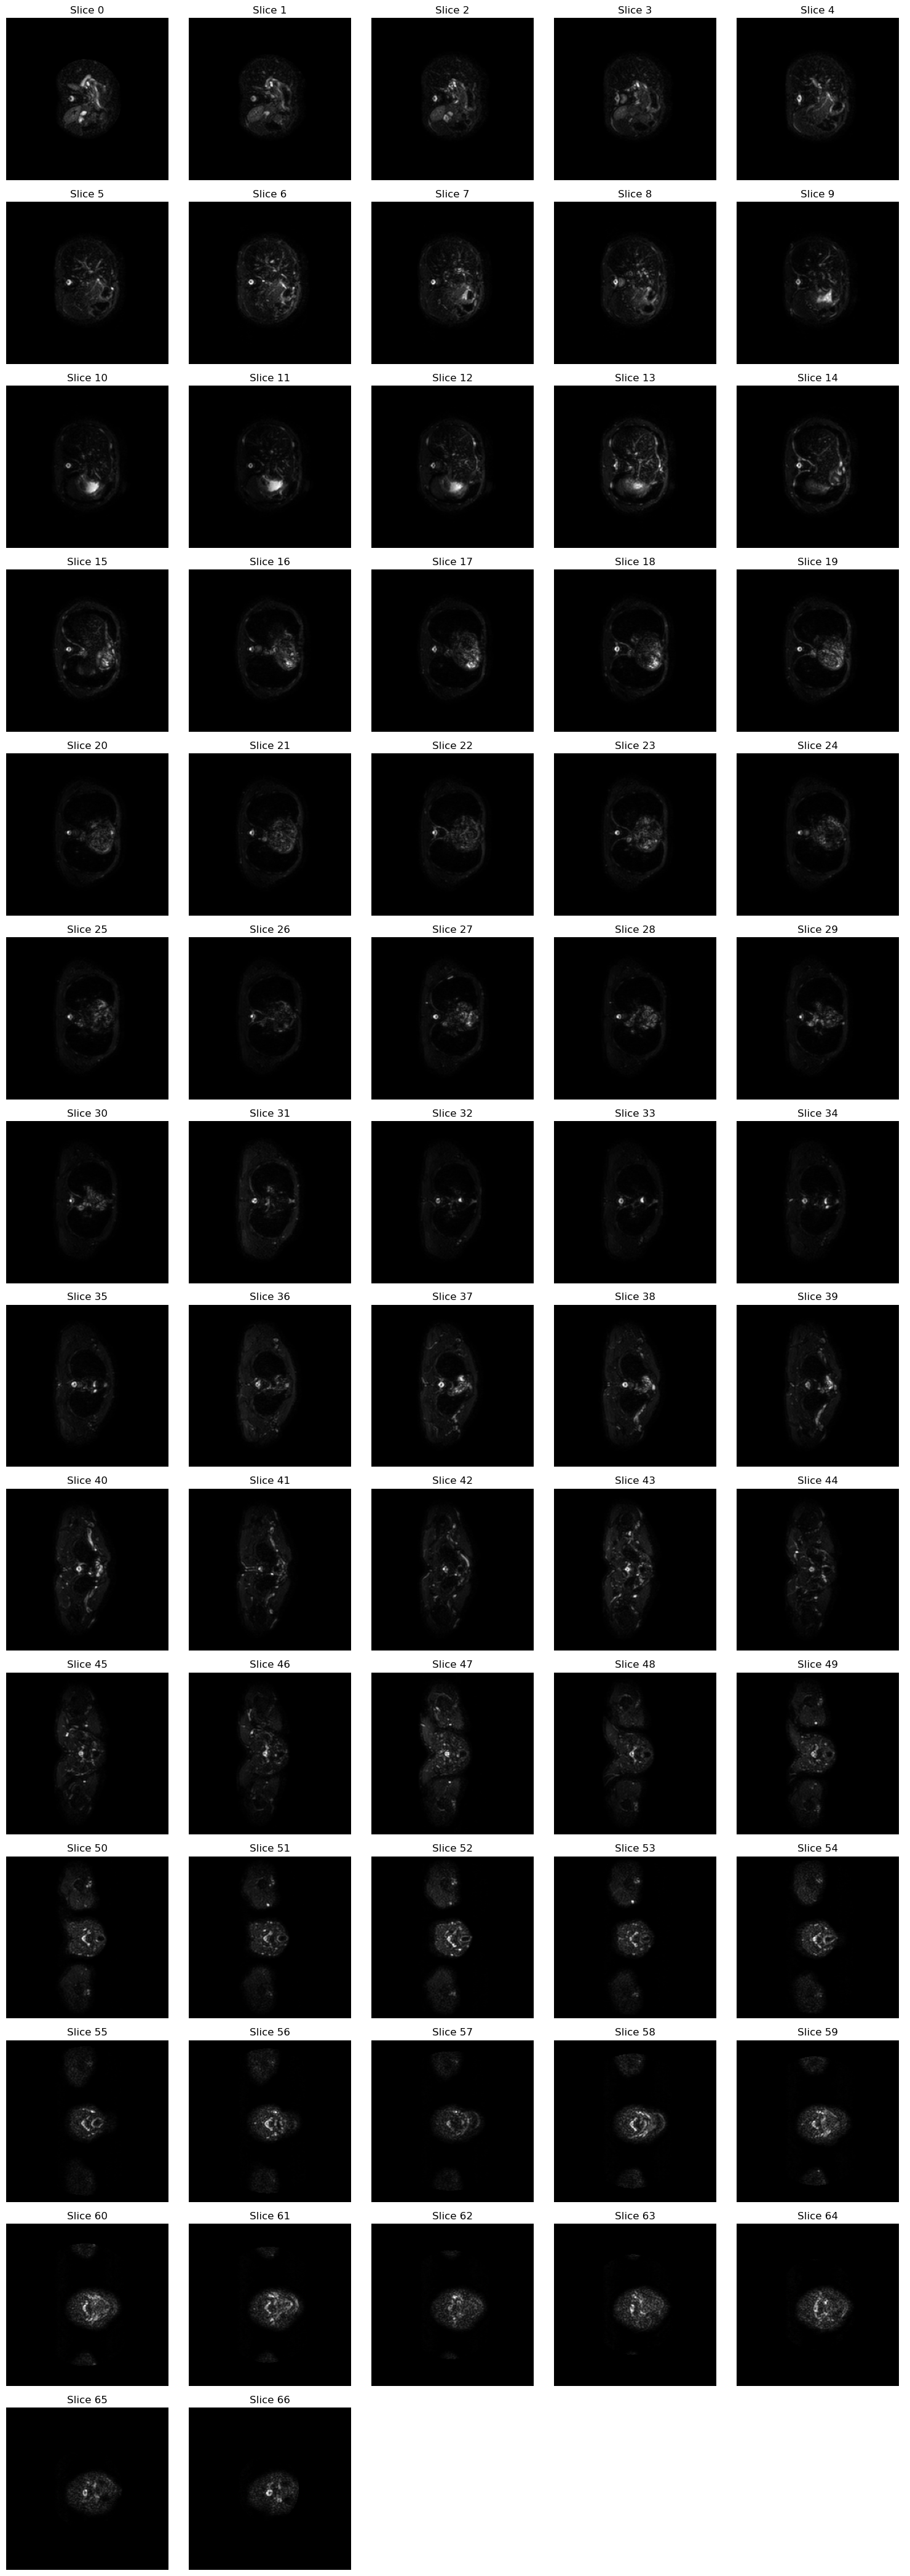

In [14]:
# Import required libraries
import nibabel as nib
import matplotlib.pyplot as plt
import math

# Load the NIfTI file
nifti_file = '/Users/ayush/Desktop/project-internsip/Datasets/ivim_chest.nii'
img = nib.load(nifti_file)

# Get the image data as a NumPy array
data = img.get_fdata()

# Define the number of rows and columns for the grid
num_slices = data.shape[2]
cols = 5  # Number of columns in the grid
rows = math.ceil(num_slices / cols)  # Calculate the number of rows needed

# Create a figure for the grid
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 3))

# Iterate through all slices and plot them in the grid
for slice_index in range(num_slices):
    row = slice_index // cols
    col = slice_index % cols
    ax = axes[row, col] if rows > 1 else axes[col]
    
    # Select the first channel (if applicable) or reduce the 3D slice to 2D
    slice_2d = data[:, :, slice_index, 0] if data.ndim == 4 else data[:, :, slice_index]
    
    ax.imshow(slice_2d, cmap='gray')
    ax.set_title(f'Slice {slice_index}')
    ax.axis('off')

# Hide any unused subplots
for i in range(num_slices, rows * cols):
    row = i // cols
    col = i % cols
    ax = axes[row, col] if rows > 1 else axes[col]
    ax.axis('off')

plt.tight_layout()
plt.show()

## Load the NIfTI File

File: ivim_chest.nii.gz
Shape: (224, 224, 67, 9)
Using volume 0 of 9


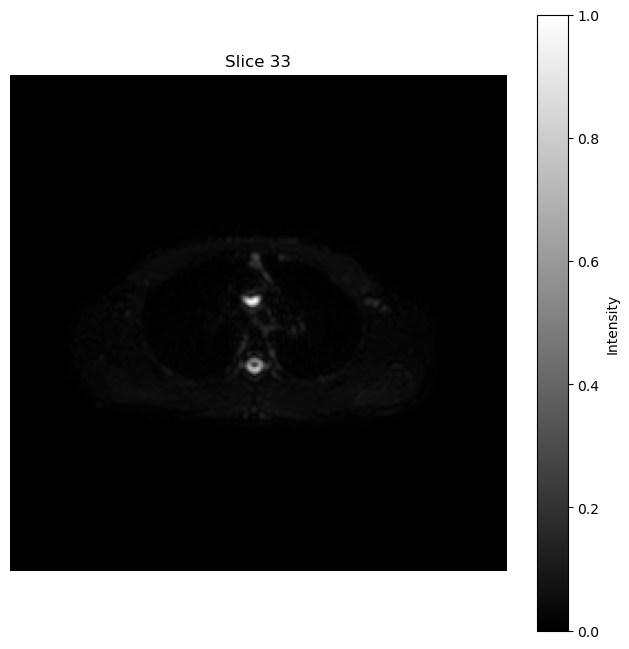

File: tumor.nii.gz
Shape: (192, 192, 64)


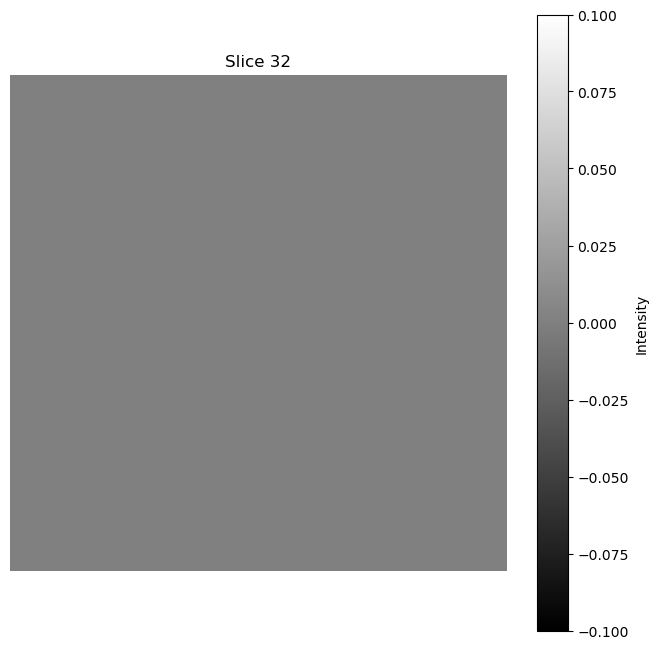

In [5]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np

def show_nifti_slice(file_path, slice_index=None, volume_index=0):
    """
    Display a single slice from a NIfTI file.
    
    Parameters:
        file_path (str): Path to the NIfTI file
        slice_index (int): Index of the slice to display (default: middle slice)
        volume_index (int): For 4D data, which volume to use (default: 0)
    """
    # Load the NIfTI file
    img = nib.load(file_path)
    data = img.get_fdata()
    
    # Print basic info
    print(f"File: {file_path.split('/')[-1]}")
    print(f"Shape: {data.shape}")
    
    # Handle 3D vs 4D data
    if len(data.shape) > 3:
        # 4D data - select the specified volume
        data_3d = data[..., volume_index]
        print(f"Using volume {volume_index} of {data.shape[3]}")
    else:
        # Already 3D data
        data_3d = data
    
    # If slice_index is not specified, use the middle slice
    if slice_index is None:
        slice_index = data_3d.shape[2] // 2
    
    # Extract the slice (axial view)
    slice_data = data_3d[:, :, slice_index]
    
    # Normalize for better visualization
    if slice_data.max() > slice_data.min():
        normalized = (slice_data - slice_data.min()) / (slice_data.max() - slice_data.min())
    else:
        normalized = slice_data
        
    # Display the slice
    plt.figure(figsize=(8, 8))
    plt.imshow(normalized.T, cmap='gray', origin='lower')
    plt.title(f'Slice {slice_index}')
    plt.colorbar(label='Intensity')
    plt.axis('off')
    plt.show()

# Display a slice from each file
show_nifti_slice('/Users/ayush/Desktop/project-internsip/Datasets/ivim_chest.nii.gz')
show_nifti_slice('/Users/ayush/Desktop/project-internsip/Datasets/tumor.nii.gz')

## Inspect the Volume Shape

File: ivim_chest.nii.gz
Shape: (224, 224, 67, 9)
Data type: float64
Value range: [0.0, 3827.760816335678]
Note: 4D data detected. Using first volume (of 9)


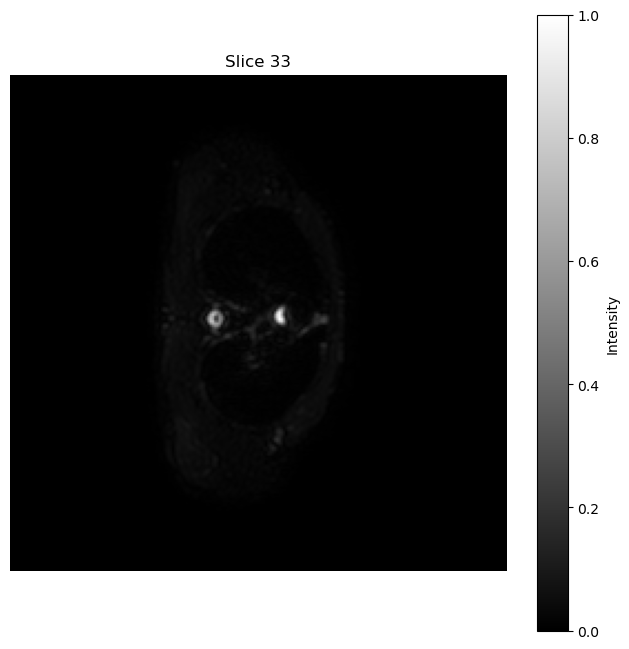

File: tumor.nii.gz
Shape: (192, 192, 64)
Data type: float64
Value range: [0.0, 1.0]


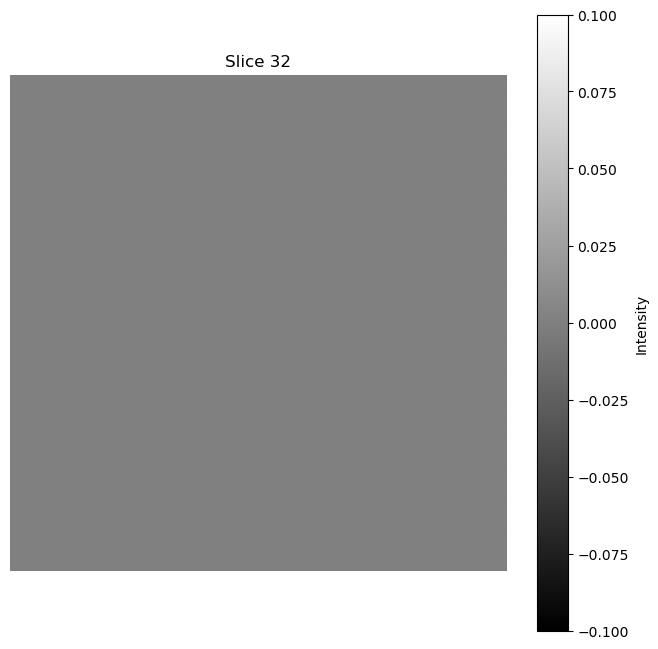

In [1]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np

def display_nifti_slice(file_path, slice_index=None):
    """
    Display a single slice from a NIfTI file with error handling.
    
    Parameters:
        file_path (str): Path to the NIfTI file
        slice_index (int): Index of the slice to display (default: middle slice)
    """
    # Load the image safely
    try:
        img = nib.load(file_path)
        data = img.get_fdata()
        print(f"File: {file_path.split('/')[-1]}")
        print(f"Shape: {data.shape}")
        print(f"Data type: {data.dtype}")
        print(f"Value range: [{data.min()}, {data.max()}]")
    except Exception as e:
        print(f"Error loading file: {e}")
        return
    
    # Handle dimensions and select a slice
    if len(data.shape) > 3:  # 4D data
        # Select the first volume
        data_3d = data[..., 0]
        print(f"Note: 4D data detected. Using first volume (of {data.shape[3]})")
    else:  # 3D data
        data_3d = data
    
    # Select the middle slice if not specified
    if slice_index is None:
        slice_index = data_3d.shape[2] // 2
    
    # Extract the slice safely
    try:
        slice_data = data_3d[:, :, slice_index]
    except IndexError:
        print(f"Error: Invalid slice index {slice_index} for shape {data_3d.shape}")
        return
    
    # Normalize for better visualization
    if slice_data.max() > slice_data.min():
        norm_data = (slice_data - slice_data.min()) / (slice_data.max() - slice_data.min())
    else:
        norm_data = slice_data
    
    # Display the slice
    plt.figure(figsize=(8, 8))
    plt.imshow(norm_data, cmap='gray')  # No transpose, avoid orientation issues
    plt.title(f'Slice {slice_index}')
    plt.colorbar(label='Intensity')
    plt.axis('off')
    plt.show()

# Display slices from each file
display_nifti_slice('/Users/ayush/Desktop/project-internsip/Datasets/ivim_chest.nii.gz')
display_nifti_slice('/Users/ayush/Desktop/project-internsip/Datasets/tumor.nii.gz')

## Select a Single Slice

In [4]:
import nibabel as nib
import matplotlib.pyplot as plt

# Change the path to your path
path = '/Users/ayush/Desktop/project-internsip/Datasets/ivim_chest.nii.gz'
Nifti_img  = nib.load(path)
nii_data = my_img.get_fdata()
nii_aff  = my_img.affine
nii_hdr  = my_img.header
print(nii_aff ,'\n',nii_hdr)
print(nii_data.shape)
if(len(nii_data.shape)==3):
   for slice_Number in range(nii_data.shape[2]):
       plt.imshow(nii_data[:,:,slice_Number ])
       plt.show()
if(len(nii_data.shape)==4):
   for frame in range(nii_data.shape[3]):
       for slice_Number in range(nii_data.shape[2]):
           plt.imshow(nii_data[:,:,slice_Number,frame])
           plt.show()

NameError: name 'my_img' is not defined

## Display the Slice with Matplotlib

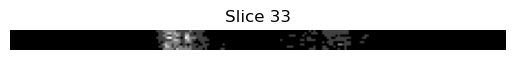

In [22]:
# Display the selected slice
# Select the first channel if the data has multiple channels
slice_2d_single_channel = slice_2d[0, :, :] if slice_2d.ndim == 3 else slice_2d

# Display the selected slice
plt.imshow(slice_2d_single_channel.T, cmap='gray', origin='lower')  # Transpose the slice for correct orientation
plt.title(f'Slice {slice_index}')
plt.axis('off')
plt.show()
